In [1]:
import pandas as pd

from io import StringIO

In [2]:
import matplotlib as mpl

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import ScalarFormatter

In [4]:
import matplotlib

In [5]:
matplotlib.rc('font', size=20)

In [28]:
orig_text = """
                                            oof_accuracy                                                         test_accuracy                                                        
                                                    mean t_int_l t_int_h    std                           values          mean t_int_l t_int_h    std                           values
name                                                                                                                                                                                  
lgb_embeds: emb__hidden_size_0032.pickle          0.6175  0.6116  0.6235 0.0048  [0.613 0.614 0.617 0.619 0.625]        0.5935  0.5915  0.5954 0.0016  [0.591 0.593 0.593 0.593 0.596]
lgb_embeds: emb__hidden_size_0064.pickle          0.6214  0.6166  0.6262 0.0039  [0.618 0.620 0.621 0.621 0.628]        0.6088  0.6060  0.6115 0.0022  [0.605 0.608 0.610 0.610 0.611]
lgb_embeds: emb__hidden_size_0100.pickle          0.6233  0.6192  0.6275 0.0033  [0.619 0.622 0.624 0.626 0.626]        0.6114  0.6098  0.6130 0.0013  [0.610 0.610 0.612 0.612 0.613]
lgb_embeds: emb__hidden_size_0200.pickle          0.6142  0.6063  0.6220 0.0063  [0.608 0.612 0.613 0.614 0.625]        0.5911  0.5870  0.5953 0.0033  [0.588 0.588 0.590 0.593 0.596]
linear_embeds: emb__hidden_size_0032.pickle       0.5851  0.5769  0.5934 0.0066  [0.580 0.581 0.582 0.586 0.596]        0.5718  0.5701  0.5736 0.0014  [0.570 0.571 0.572 0.573 0.573]
linear_embeds: emb__hidden_size_0064.pickle       0.6101  0.6046  0.6155 0.0044  [0.606 0.606 0.610 0.612 0.617]        0.6039  0.6019  0.6059 0.0016  [0.602 0.603 0.603 0.605 0.606]
linear_embeds: emb__hidden_size_0100.pickle       0.6096  0.6040  0.6151 0.0045  [0.603 0.606 0.612 0.613 0.614]        0.6128  0.6113  0.6142 0.0012  [0.611 0.612 0.613 0.613 0.615]
linear_embeds: emb__hidden_size_0200.pickle       0.5940  0.5889  0.5991 0.0041  [0.589 0.591 0.594 0.597 0.599]        0.5726  0.5681  0.5771 0.0036  [0.567 0.571 0.573 0.575 0.576]
xgb_embeds: emb__hidden_size_0032.pickle          0.6189  0.6109  0.6268 0.0064  [0.614 0.614 0.615 0.622 0.629]        0.5921  0.5886  0.5957 0.0029  [0.588 0.591 0.592 0.593 0.596]
xgb_embeds: emb__hidden_size_0064.pickle          0.6233  0.6184  0.6281 0.0039  [0.620 0.622 0.622 0.622 0.630]        0.6083  0.6067  0.6100 0.0013  [0.606 0.608 0.609 0.609 0.610]
xgb_embeds: emb__hidden_size_0100.pickle          0.6219  0.6175  0.6262 0.0035  [0.618 0.619 0.623 0.625 0.625]        0.6085  0.6064  0.6107 0.0017  [0.607 0.607 0.608 0.609 0.611]
xgb_embeds: emb__hidden_size_0200.pickle          0.6124  0.6051  0.6197 0.0059  [0.606 0.611 0.611 0.612 0.622]        0.5916  0.5876  0.5955 0.0032  [0.588 0.590 0.591 0.593 0.596]
"""

In [29]:
col_stats = ['mean', 't_int_l', 't_int_h', 'std'] + [f'{i}' for i in range(5)]

In [30]:
df = pd.read_fwf(StringIO(orig_text)).iloc[3:]
df.columns = ['name'] + [f'{k}.{n}' for k in ['valid', 'test'] for n in col_stats]

In [31]:
df = pd.concat([
    df['name'].str.extract(
        r'(?P<model_type>\w+): emb__hidden_size_(?P<hidden_size>\d+)\.pickle'),
    df
], axis=1)

In [32]:
for col, dt in df.dtypes.iteritems():
    if col in ('name', 'model_type'):
        continue
    if dt == 'float':
        continue
    df[col] = pd.to_numeric(df[col].str.strip('[').str.strip(']'))

In [33]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: lightyellow' if v else '' for v in is_max]

def highlight_values(v):
    return 'background-color: lightyellow' if not pd.isna(v) else ''

In [34]:
df2 = pd.melt(
    df,
    id_vars=['model_type', 'hidden_size', 'name'],
    var_name='fold_n',
    value_vars=[f'valid.{i}' for i in range(5)],
    value_name='Valid accuracy',
)

In [35]:
df2

,model_type,hidden_size,name,fold_n,Valid accuracy
0,lgb_embeds,32,lgb_embeds: emb__hidden_size_0032.pickle,valid.0,0.613
1,lgb_embeds,64,lgb_embeds: emb__hidden_size_0064.pickle,valid.0,0.618
2,lgb_embeds,100,lgb_embeds: emb__hidden_size_0100.pickle,valid.0,0.619
3,lgb_embeds,200,lgb_embeds: emb__hidden_size_0200.pickle,valid.0,0.608
4,linear_embeds,32,linear_embeds: emb__hidden_size_0032.pickle,valid.0,0.580
5,linear_embeds,64,linear_embeds: emb__hidden_size_0064.pickle,valid.0,0.606
6,linear_embeds,100,linear_embeds: emb__hidden_size_0100.pickle,valid.0,0.603
7,linear_embeds,200,linear_embeds: emb__hidden_size_0200.pickle,valid.0,0.589
8,xgb_embeds,32,xgb_embeds: emb__hidden_size_0032.pickle,valid.0,0.614
9,xgb_embeds,64,xgb_embeds: emb__hidden_size_0064.pickle,valid.0,0.620


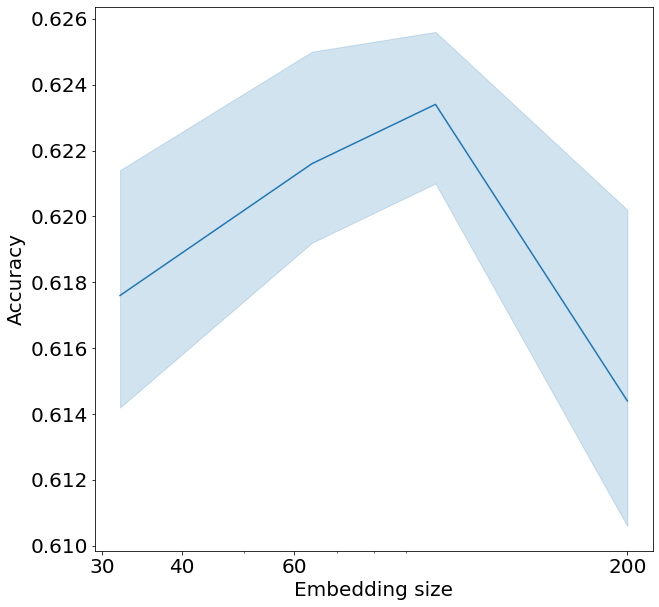

In [87]:
with mpl.rc_context() as rc:
    mpl.rc("figure", figsize=(10,10))
    mpl.rc('font', size=20)
    
    ax = sns.lineplot(
        x='Embedding size',
        y='Accuracy',
        palette='tab10',
        data=df2[lambda x: x['model_type'].eq('lgb_embeds')]
        .rename(columns={'hidden_size': 'Embedding size', 'Valid accuracy': 'Accuracy'}),
        ci=95,
    )
    
    ax.set_xscale('log')
    ax.set_xlabel('Embedding size')

    # ax.set(ylim=(0.74, 0.89))
    ax.set_facecolor('white')

    x_ticks = [30, 40, 60, 200]
    ax.set_xticks(x_ticks)
    ax.get_xaxis().set_major_formatter(ScalarFormatter())
    #plt.grid(color='white')
    #ax.get_xaxis().get_major_formatter().labelOnlyBase = False
    
    mpl.pyplot.savefig('bowl-hidden-size.pdf', format='pdf', bbox_inches='tight')
    
# plt.title('Age prediction task')
# ax.set_xscale('log'),
# ax.set_xticks([2 ** i for i in range(5, 12)])
# ax.get_xaxis().set_major_formatter(ScalarFormatter())

# # plt.axhline(df['valid.mean'].quantile(0.99), color='black', linestyle='--', linewidth=1)
# # plt.axhspan(0.6285, 0.6387, alpha=0.1, color='black')
# # plt.grid()
# # plt.legend(loc='lower right')
# # plt.show()

# plt.savefig('age-pred-hidden-size.pdf', format='pdf', bbox_inches='tight')